In [1]:
import pandas as pd
import numpy as np
from scipy import stats

import requests 
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
# load data
students = pd.read_csv("responses.csv")
students.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow


# Analysing students that are an Only Child, and their happiness in life.


H_0 => students that are an only child are ***just as happy in life, if not more happy** than students that have children

> 𝐻_0 : The mean difference between treatment and control groups is zero. i.e. M(experiment) = M(control)

H_a => students that are an only child are less happy in life

> 𝐻_1: (1-tailed, <): The mean difference between experiment and control groups, is less than zero (negative).




In [3]:
# create sample of 'Happiness in life' scores for students that are an Only Child (experiment)
# create sample of 'Happiness in life' scores for students that have siblings (control)
# keep both groups size the same

oc_happiness = students['Happiness in life'][students['Only child'] == 'yes'].dropna()
sibl_happiness = students['Happiness in life'][students['Only child'] == 'no'].dropna().head(252)

oc_happiness.describe()

count    252.000000
mean       3.670635
std        0.918302
min        1.000000
25%        3.000000
50%        4.000000
75%        4.000000
max        5.000000
Name: Happiness in life, dtype: float64

In [4]:
sibl_happiness.describe()

count    252.000000
mean       3.642857
std        0.837034
min        1.000000
25%        3.000000
50%        4.000000
75%        4.000000
max        5.000000
Name: Happiness in life, dtype: float64

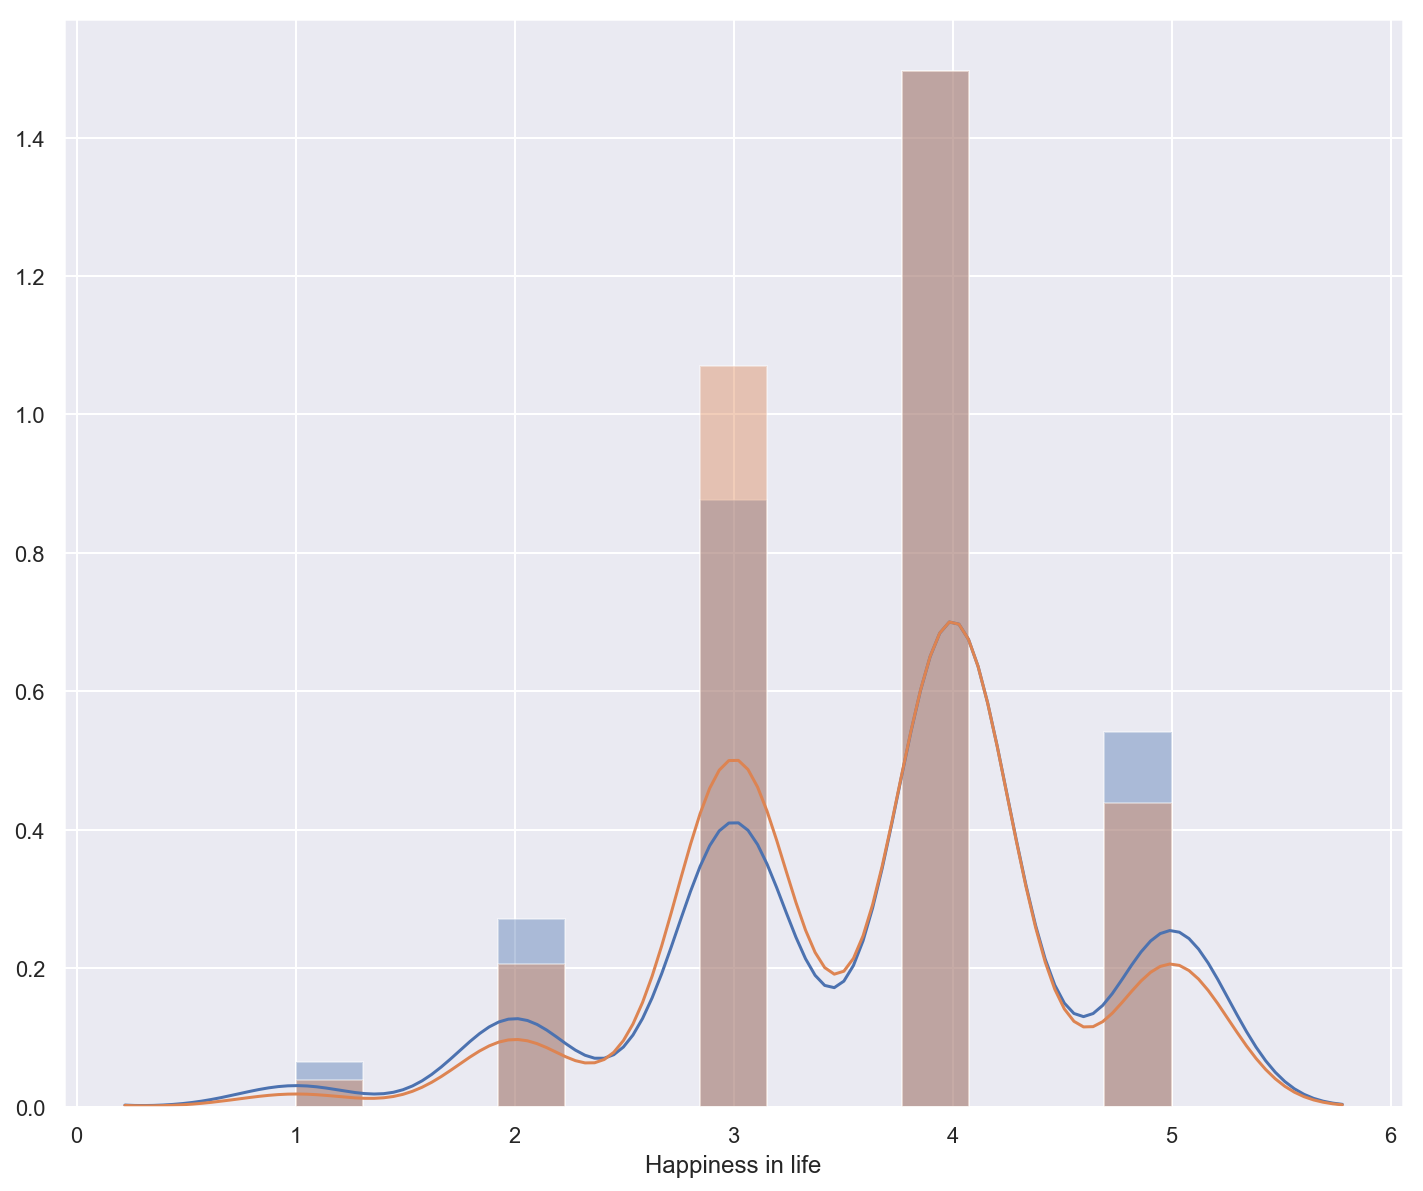

In [5]:
# plot the distribution of both samples

sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(12,10)})
sns.distplot(oc_happiness) # Blue distribution
sns.distplot(sibl_happiness) # Orange distribution

In [6]:
# Run a 2 sample ttest on your samples

'''
Calculates the T-test for the means of *two independent* samples of scores.

This is a two-sided test for the null hypothesis that 2 independent samples
have identical average (expected) values. This test assumes that the
populations have identical variances by default.

'''

stats.ttest_ind(oc_happiness, sibl_happiness)

Ttest_indResult(statistic=0.3548850124690555, pvalue=0.7228247802566437)

# Observations

# Music Genres vs. Movie Genres

At this point, we want to test the suggestion that students with similar taste in music also have similar taste in movies. We will focus on Metal & Hard Rock listeners and their affinity of Horror movies, and will use a **Chi-Squared Independence test** to see how Horror movie score correlates to Metal & Hard Rock score

Our Hypothesis statement is as follows:

> H_0 => There is **NO** statistically significant relationship between Metal & Hard Rock scores and Horror movie scores.

> H_a => There is a statistically significant relationship between Metal & Hard Rock scores and Horror movie scores.


In [7]:
# let's get some summary statistics on both scores
students[['Metal or Hardrock', 'Horror']].dropna().describe()

,Metal or Hardrock,Horror
count,1005.000000,1005.000000
mean,2.360199,2.789055
std,1.371163,1.409727
min,1.000000,1.000000
25%,1.000000,1.000000
50%,2.000000,3.000000
75%,3.000000,4.000000
max,5.000000,5.000000


In [8]:
# create contigency table for Chi-Squared

contingency_table = pd.crosstab(
    students['Metal or Hardrock'],
    students['Horror'],
    margins = True
)

contingency_table

Horror,1.0,2.0,3.0,4.0,5.0,All
Metal or Hardrock,,,,,,
1.0,106,85,82,54,56,383
2.0,52,41,47,45,34,219
3.0,36,35,35,33,25,164
4.0,36,22,26,26,26,136
5.0,26,15,23,20,19,103
All,256,198,213,178,160,1005


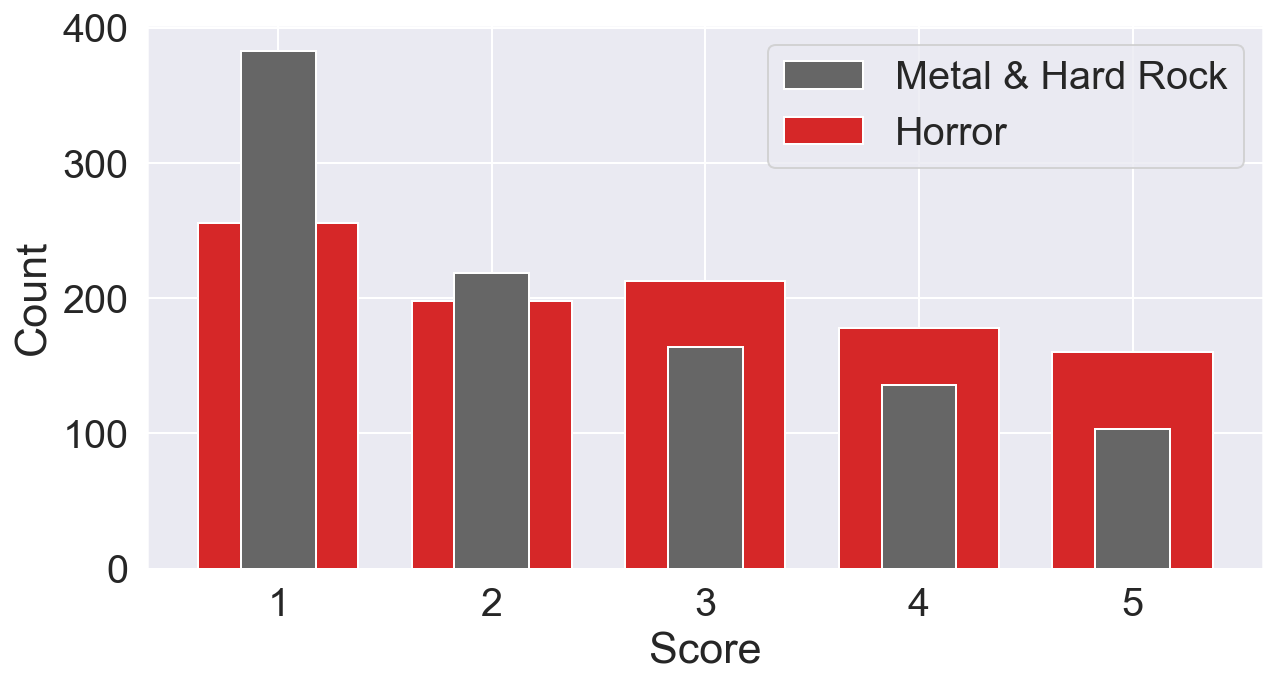

In [9]:
# visualize total of each score on both variables throughout the dataset

#assign the frequency of scores for plotting
metal = contingency_table.iloc[5,0:5].values
horror = contingency_table['All'][0:5]


#plot the bar chart
fig = plt.figure(figsize=(10, 5))
sns.set(font_scale=1.8)
scores = ["1","2","3","4","5"]
p1 = plt.bar(scores, metal, 0.75, color='#d62728')
p2 = plt.bar(scores, horror, 0.35, color='#666666')
plt.legend((p2[0], p1[0]), ('Metal & Hard Rock', 'Horror'))
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()

In [10]:
# Run chi-squared test
stats.chi2_contingency(contingency_table)[:3] # X2, p-value, degrees of freedom

(12.4094776565072, 0.982950866929013, 25)

# Observations

With p score > .05 we fail to reject null hypothesis,

there is no correlation between scores on Metal or Hardrock and scores on Horror movies